In [1]:
# !ls -hl|grep csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time, ctime

from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit

from helper import plot_confusion_matrix, plot_confusion_matrix2
dim=lambda *x: [i.shape for i in x]

In [2]:
%%time
df = pd.read_csv('./preprocessed.csv')
print df.shape

(49260, 748)
CPU times: user 3 s, sys: 251 ms, total: 3.26 s
Wall time: 3.25 s


In [3]:
pd.options.display.max_columns=100
df.head(3)

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_681,feature_682,feature_683,feature_684,feature_685,feature_686,feature_687,feature_688,feature_689,feature_690,feature_691,feature_692,feature_693,feature_694,feature_695,feature_696,feature_697,feature_698,feature_699,feature_700,feature_701,feature_702,feature_703,feature_704,feature_705,feature_706,feature_707,feature_708,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,False,False,False,False,0,0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,male,male,t,ft,A,Ar,9,0.222222,0.0,False,False,False,False,0,2,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,male,female,n,an,o,ok,9,0.444444,0.0,False,True,False,False,0,0,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0


In [4]:
X = df.iloc[:,2:].values
print X.shape
y = df.iloc[:,1].map({'male':1,'female':0}).values
print y.shape

(49260, 746)
(49260,)


In [5]:
%%time
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for i in range(5):
    i=str(i)
    exec("labelencoder_X_{} = LabelEncoder()".format(i))
    exec("X[:, {}] = labelencoder_X_{}.fit_transform(X[:, {}])".format(i,i,i))

XX=X.copy()

CPU times: user 649 ms, sys: 64 ms, total: 713 ms
Wall time: 712 ms


In [6]:
%%time
print X.shape
onehotencoder = OneHotEncoder(categorical_features = range(6))
X = onehotencoder.fit_transform(X).toarray()
print X.shape

(49260, 746)
(49260, 4505)
CPU times: user 1.35 s, sys: 491 ms, total: 1.84 s
Wall time: 1.84 s


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(34482, 4505), (14778, 4505), (34482,), (14778,)]

In [8]:
%%time
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on training set
X_train = sc.fit_transform(X_train)
# only transform on test set
X_test = sc.transform(X_test)
print dim(X_train,X_test, y_train, y_test)

[(34482, 4505), (14778, 4505), (34482,), (14778,)]
CPU times: user 2.43 s, sys: 1.28 s, total: 3.71 s
Wall time: 3.7 s


In [9]:
def impliment(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print accuracy_score(y_test, pred)
    plot_confusion_matrix(confusion_matrix(y_test,pred), ['female','male'])
    return model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,RandomForestClassifier,\
ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE

from xgboost import XGBClassifier


/home/shj16110/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# 0.834348355664
# 0.835363377994  alpha =0.5
# 0.835701718771 alpha =0.6

In [12]:
X_train.shape[1]/2

2252

https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

In [13]:
# %%time
# model=RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1)
# rfe = RFE(model, X_train.shape[1]*2/3)
# rfe = rfe.fit(X_train, y_train)
# # summarize the selection of the attributes
# print(rfe.support_)
# # print(rfe.ranking_)

In [14]:
# index2=rfe.support_

In [15]:
# RFE?

0.831709297605
Confusion matrix, without normalization
[[  227  2436]
 [   51 12064]]


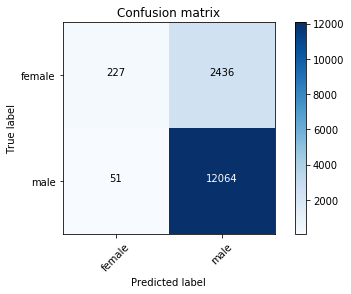

CPU times: user 1min 37s, sys: 319 ms, total: 1min 37s
Wall time: 5.68 s


In [88]:
%%time
forest = impliment(RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1))

In [89]:
index = pd.Series(forest.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/3*2].index
index

Int64Index([   0, 3765, 4504, 4502, 4503, 3804, 3800, 3817, 3808, 3818,
            ...
            1795, 4259, 3691, 1086, 3352, 2259, 2618, 1320,  827, 1456],
           dtype='int64', length=3002)

In [90]:
X_train.shape

(34482, 4505)

In [91]:
X_train[:,index].shape

(34482, 3002)

In [92]:
def impliment2(model, index):
    model.fit(X_train[:,index], y_train)
    pred = model.predict(X_test[:,index])
    print accuracy_score(y_test, pred)
    plot_confusion_matrix(confusion_matrix(y_test,pred), ['female','male'])
    return model

0.832385979158
Confusion matrix, without normalization
[[  238  2425]
 [   52 12063]]


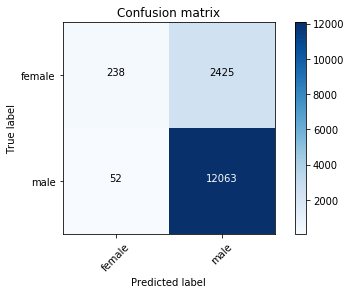

CPU times: user 1min 1s, sys: 506 ms, total: 1min 1s
Wall time: 5.42 s


In [93]:
%%time
forest = impliment2(RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1), index)

In [10]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,\
ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.feature_selection import ColumnSelector

from sklearn.pipeline import make_pipeline
import numpy as np

In [17]:
%%time
m1 = AdaBoostClassifier().fit(X_train, y_train)
index1= pd.Series(m1.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/4*3].index

m2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1).fit(X_train, y_train)
index2= pd.Series(m2.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/4*3].index

m3 = XGBClassifier(nthread=-1, max_depth=24, min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6).fit(X_train, y_train)
index3= pd.Series(m3.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/5*4].index

# m4 = BaggingClassifier(n_jobs=-1, n_estimators=50).fit(X_train, y_train)
# index4= pd.Series(m4.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/3*2].index

m5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100).fit(X_train, y_train)
index5= pd.Series(m5.feature_importances_).sort_values(ascending=False)[:X_train.shape[1]/4*3].index



CPU times: user 49min 1s, sys: 3.85 s, total: 49min 5s
Wall time: 3min 40s


In [18]:
%%time
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

pipe1 = make_pipeline(ColumnSelector(cols=index1),
                      clf1)
pipe2 = make_pipeline(ColumnSelector(cols=index2),
                      clf2)
pipe3 = make_pipeline(ColumnSelector(cols=index3),
                      clf3)
pipe5 = make_pipeline(ColumnSelector(cols=index5),
                      clf5)

sclf = StackingClassifier(classifiers=[pipe1, pipe2, pipe3, clf4, pipe5], 
                          meta_classifier=lr,
                          use_probas=True,
                          average_probas=False)

sclf.fit(X_train, y_train)

CPU times: user 25min 45s, sys: 7.31 s, total: 25min 53s
Wall time: 5min 56s


In [19]:
%%time
pred = sclf.predict(X_test)
print pred

[1 1 1 ..., 1 1 1]
CPU times: user 26.1 s, sys: 1.68 s, total: 27.8 s
Wall time: 28.3 s


In [20]:
accuracy_score(y_test, pred)

0.83779943158749492

Confusion matrix, without normalization
[[  512  2151]
 [  246 11869]]


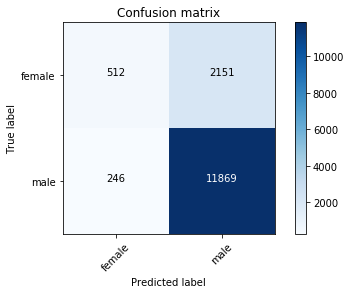

In [21]:
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=['female','male'])

In [25]:
index1.shape

(3002,)

In [24]:
X.shape

(49260, 4505)

In [11]:
ix=pd.read_csv('./feature_importance_2D3.csv')
ix.shape

(3002, 8)

In [12]:
ix.head()

,ada,forest,xgb,extraTree,ada_sort,forest_sort,xgb_sort,extraTree_sort
0,0,0,3765,0,0,0,0,0
1,3947,3765,4503,3765,1,1,1,1
2,3772,4504,4502,1,2,2,2,2
3,3553,4502,3800,4504,3,4,3,4
4,3944,4503,3804,4503,4,5,4,5


In [13]:
index1=ix.iloc[:,0].tolist()
index2=ix.iloc[:,1].tolist()
index3=ix.iloc[:,2].tolist()
index5=ix.iloc[:,3].tolist()

In [15]:
%%time
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)
lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

pipe1 = make_pipeline(ColumnSelector(cols=index1), clf1)
pipe2 = make_pipeline(ColumnSelector(cols=index2), clf2)
pipe3 = make_pipeline(ColumnSelector(cols=index3), clf3)
pipe5 = make_pipeline(ColumnSelector(cols=index5), clf5)

sclf = StackingClassifier(classifiers=[pipe3, pipe1, pipe2, clf4, pipe5], 
                          meta_classifier=lr,
                          use_probas=True,
                          average_probas=False)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    
    stack3 = []
    for clf, label in zip([pipe3, pipe1, pipe2,  clf4, pipe5,  sclf], 
                          ['Xgboost',
                           'AdaBoost', 
                           'Random Forest', 
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
#                                                  n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack3.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.8286 (+/- 0.0015) [Xgboost]
Accuracy: 0.8236 (+/- 0.0006) [AdaBoost]
Accuracy: 0.8253 (+/- 0.0011) [Random Forest]
Accuracy: 0.8260 (+/- 0.0023) [Bagging]
Accuracy: 0.8281 (+/- 0.0011) [ExtraTrees]
Accuracy: 0.8305 (+/- 0.0016) [Stacking]
CPU times: user 5h 14min 3s, sys: 1min 39s, total: 5h 15min 42s
Wall time: 1h 5min 43s


In [133]:
index1.sort_values()

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4460, 4461, 4462, 4463, 4464, 4465, 4466, 4468, 4502, 4504],
           dtype='int64', length=3002)

In [137]:
imp = pd.DataFrame([index1, index2, index3, index5, 
                    index1.sort_values(), index2.sort_values(), index3.sort_values(), index5.sort_values()]).transpose()
imp.columns=[['ada','forest','xgb','extraTree', 'ada_sort','forest_sort','xgb_sort','extraTree_sort']]
imp.to_csv('feature_importance_2D3.csv', index=False)
imp

,ada,forest,xgb,extraTree,ada_sort,forest_sort,xgb_sort,extraTree_sort
0,0,0,3765,0,0,0,0,0
1,3947,3765,4503,3765,1,1,1,1
2,3772,4504,4502,1,2,2,2,2
3,3553,4502,3800,4504,3,4,3,4
4,3944,4503,3804,4503,4,5,4,5
5,4052,3804,4504,3800,5,6,5,6
6,3086,3800,3817,4502,6,7,6,7
7,4177,3817,3813,3804,7,8,7,8
8,3792,3808,3808,3774,8,9,8,9
9,1585,3818,3818,3808,9,10,9,10
